<a href="https://colab.research.google.com/github/AhmedRezaShams/Python/blob/main/Reza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt #s a collection of functions  work like MATLAB. Each pyplot function makes some change to a figure:
import numpy as np # array er sathe kaj korar jono
import os #function  for intracting with operrating
import tensorflow as tf #library 
print(tf.__version__) 

2.12.0


In [ ]:
!pip install -U -q PyDrive  #py framework
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client  import GoogleCredentials  #clint library
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='fabric_defect.zip'"}).GetList()[0]['id'] #is a method call in the Google Drive API for Python that lists all the files in the current user's Google Drive that match a certain query.
f = drive.CreateFile({'id': fid})
f.GetContentFile('fabric_defect.zip')
f.keys()
!unzip fabric_defect.zip


Archive:  fabric_defect.zip
   creating: Fabric defect/
   creating: Fabric defect/test/
   creating: Fabric defect/test/hole/
  inflating: Fabric defect/test/hole/1.jpg  
  inflating: Fabric defect/test/hole/10.jpg  
  inflating: Fabric defect/test/hole/10_processed (1).jpg  
  inflating: Fabric defect/test/hole/10_processed (2).jpg  
  inflating: Fabric defect/test/hole/10_processed (3).jpg  
  inflating: Fabric defect/test/hole/11.jpg  
  inflating: Fabric defect/test/hole/11_processed (1).jpg  
  inflating: Fabric defect/test/hole/11_processed (2).jpg  
  inflating: Fabric defect/test/hole/11_processed (3).jpg  
  inflating: Fabric defect/test/hole/12.jpg  
  inflating: Fabric defect/test/hole/12_processed (1).jpg  
  inflating: Fabric defect/test/hole/12_processed (2).jpg  
  inflating: Fabric defect/test/hole/12_processed (3).jpg  
  inflating: Fabric defect/test/hole/13.jpg  
  inflating: Fabric defect/test/hole/13_processed (1).jpg  
  inflating: Fabric defect/test/hole/13_proc

In [ ]:
train_dir = '/content/Fabric defect/train'
validation_dir = '/content/Fabric defect/validation'

BATCH_SIZE = 32
IMG_SIZE = (224, 224)
no_classes = 4

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 666 files belonging to 4 classes.
Found 403 files belonging to 4 classes.


In [ ]:
#Hasan Muhammad Kafi
class_names = train_dataset.class_names
print(class_names)

['Lines', 'hole', 'horizontal', 'verticle']


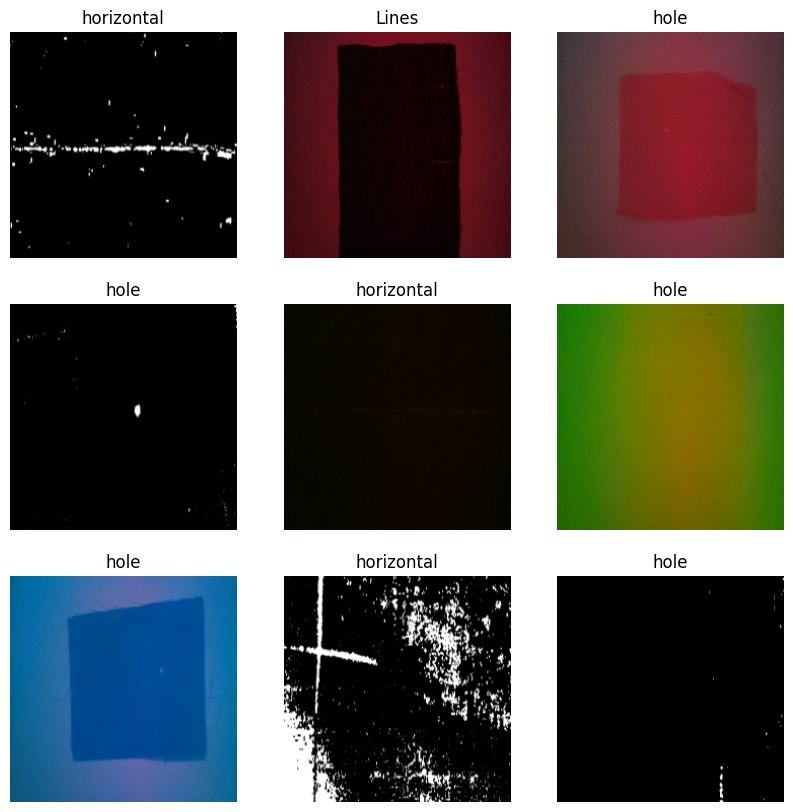

In [ ]:
#Hasan Muhammad Kafi vai
plt.figure(figsize=(10, 10))#The figsize parameter is a tuple that specifies the width and height of the figure in inches.
for images, labels in train_dataset.take(1): #returns the first element of the train_dataset objec
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))#is a method that converts the data type of the NumPy array to unsigned 8-bit integers,
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

#model = keras.Model(inputs, outputs)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_dataset,
    epochs=25,
    validation_data=validation_dataset,
)

Epoch 1/25
21/21 [==============================] - 171s 8s/step - loss: 15.9083 - accuracy: 0.4505 - val_loss: 5523.2964 - val_accuracy: 0.1663
Epoch 2/25
21/21 [==============================] - 144s 7s/step - loss: 5.1716 - accuracy: 0.5571 - val_loss: 651.1206 - val_accuracy: 0.1563
Epoch 3/25
21/21 [==============================] - 171s 8s/step - loss: 3.2157 - accuracy: 0.5661 - val_loss: 83.1596 - val_accuracy: 0.1489
Epoch 4/25
21/21 [==============================] - 163s 8s/step - loss: 1.8598 - accuracy: 0.6216 - val_loss: 14.6718 - val_accuracy: 0.3176
Epoch 5/25
21/21 [==============================] - 143s 7s/step - loss: 1.2856 - accuracy: 0.6426 - val_loss: 13.1033 - val_accuracy: 0.3797
Epoch 6/25
21/21 [==============================] - 166s 8s/step - loss: 1.0147 - accuracy: 0.7132 - val_loss: 1.3926 - val_accuracy: 0.6303
Epoch 7/25
21/21 [==============================] - 160s 8s/step - loss: 0.8996 - accuracy: 0.7102 - val_loss: 1.0208 - val_accuracy: 0.6799
Epoc

In [ ]:
!pip install tensorflow
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


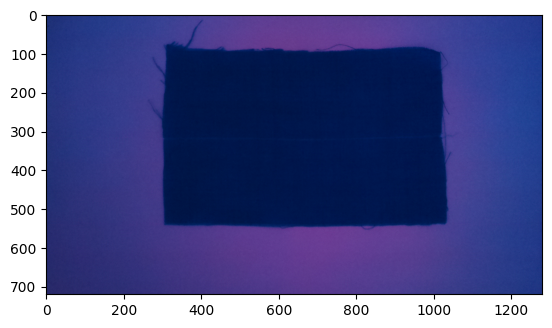

In [ ]:
import matplotlib.image as mpimg

img_path = "/content/Fabric defect/test/Lines/line_2018-09-19 15_19_10.492631.jpg"
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
from PIL import Image
import numpy
np_img = numpy.array(img)
print(np_img.shape)
img_batch = np.expand_dims(np_img, axis=0)

(224, 224, 3)


In [ ]:
img_preprocessed = preprocess_input(img_batch)

In [ ]:
model = tf.keras.applications.resnet50.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
prediction = model.predict(img_preprocessed)

1/1 [==============================] - 2s 2s/step
